# **Problem Statement:Predicting the strength of cement**

# import all libraries

In [93]:
import pandas as pd , numpy as np
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from collections import Counter
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.svm import SVC
from sklearn import metrics

from sklearn.model_selection import train_test_split

In [94]:
data=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Yhills_July12_Analytics//main/concrete.csv")

In [95]:
data.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [96]:
data.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [97]:
data.shape

(1030, 9)

In [98]:
len(data)

1030

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [100]:
data.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [101]:
data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [102]:
data.tail(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1020,183.9,122.6,0.0,203.5,0.0,959.2,800.0,7,10.79
1021,203.5,305.3,0.0,203.5,0.0,963.4,630.0,3,9.56
1022,144.8,0.0,133.6,180.8,11.1,979.5,811.5,28,13.20
1023,141.3,212.0,0.0,203.5,0.0,971.8,748.5,7,10.39
1024,297.2,0.0,117.5,174.8,9.5,1022.8,753.5,3,21.91
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06
1029,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,7,52.61


one hot encoding

In [103]:
#missing values:slag,ash,superplastic

In [104]:
data.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [105]:
data['slag']=data['slag'].replace(to_replace=0,value=np.nan)
data['slag']=data['slag'].astype(float)

In [106]:
data['ash']=data['ash'].replace(to_replace=0,value=np.nan)
data['ash']=data['ash'].astype(float)

In [107]:
data['superplastic']=data['superplastic'].replace(to_replace=0,value=np.nan)
data['superplastic']=data['superplastic'].astype(float)

In [108]:
median1=data['slag'].median()
median1

135.7

In [109]:
median2=data['ash'].median()
median2

121.4

In [110]:
median3=data['superplastic'].median()
median3

9.4

In [111]:
data['slag'].replace(np.nan,median1,inplace=True)
data['ash'].replace(np.nan,median2,inplace=True)
data['superplastic'].replace(np.nan,median3,inplace=True)


In [112]:
data.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,121.4,203.5,9.4,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,135.7,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,121.4,228.0,9.4,932.0,670.0,28,45.85
4,154.8,183.4,121.4,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,135.7,121.4,192.0,9.4,889.8,945.0,90,21.86
6,166.8,250.2,121.4,203.5,9.4,975.6,692.6,7,15.75
7,251.4,135.7,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,135.7,121.4,192.0,9.4,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [113]:
data.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,135.948932,120.899417,181.567282,9.663495,972.918932,773.580485,45.662136,35.817961
std,104.506364,53.279837,22.595744,21.354219,3.645923,77.753954,80.175980,63.169912,16.705742
min,102.000000,11.000000,24.500000,121.800000,1.700000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,129.800000,121.400000,164.900000,8.200000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,135.700000,121.400000,185.000000,9.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,121.400000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


# **EXPLORATORY DATA ANALYSIS**

# SCATTER PLOT

Text(0.5, 0, 'cement')

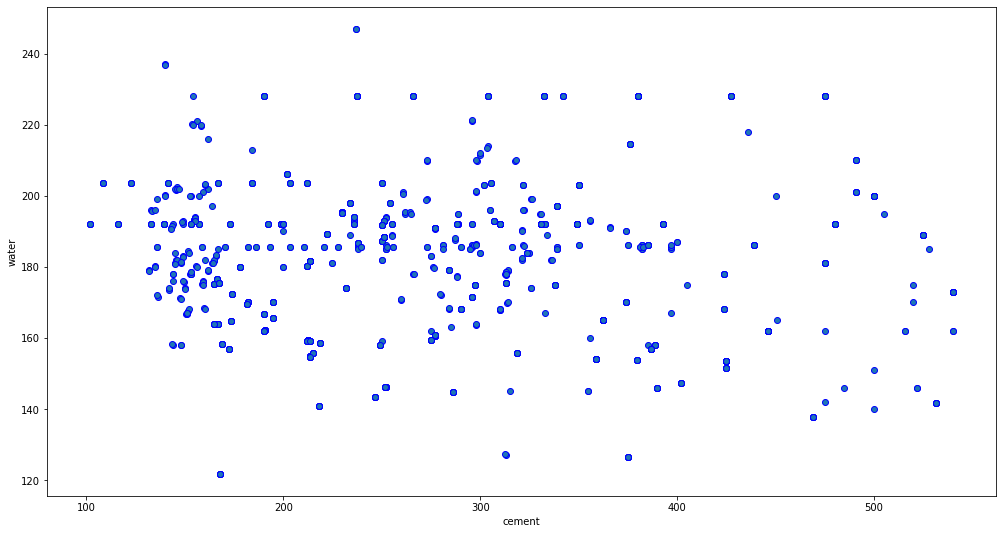

In [114]:
#scatter plot 
plt.figure(figsize=[17,9])
plt.scatter(y='water',x='cement',edgecolor='blue',data=data)
plt.ylabel('water')
plt.xlabel('cement')

*We make use of matplotlib to plot scatter plot.

*Here we can see that x axis contains ''cement'' and y axis contains ''strength''.

*As we increase the amount of cement in the concrete then,the quality of cement may increase as shown in the scatter plot

# **CORRELATION PLOT**

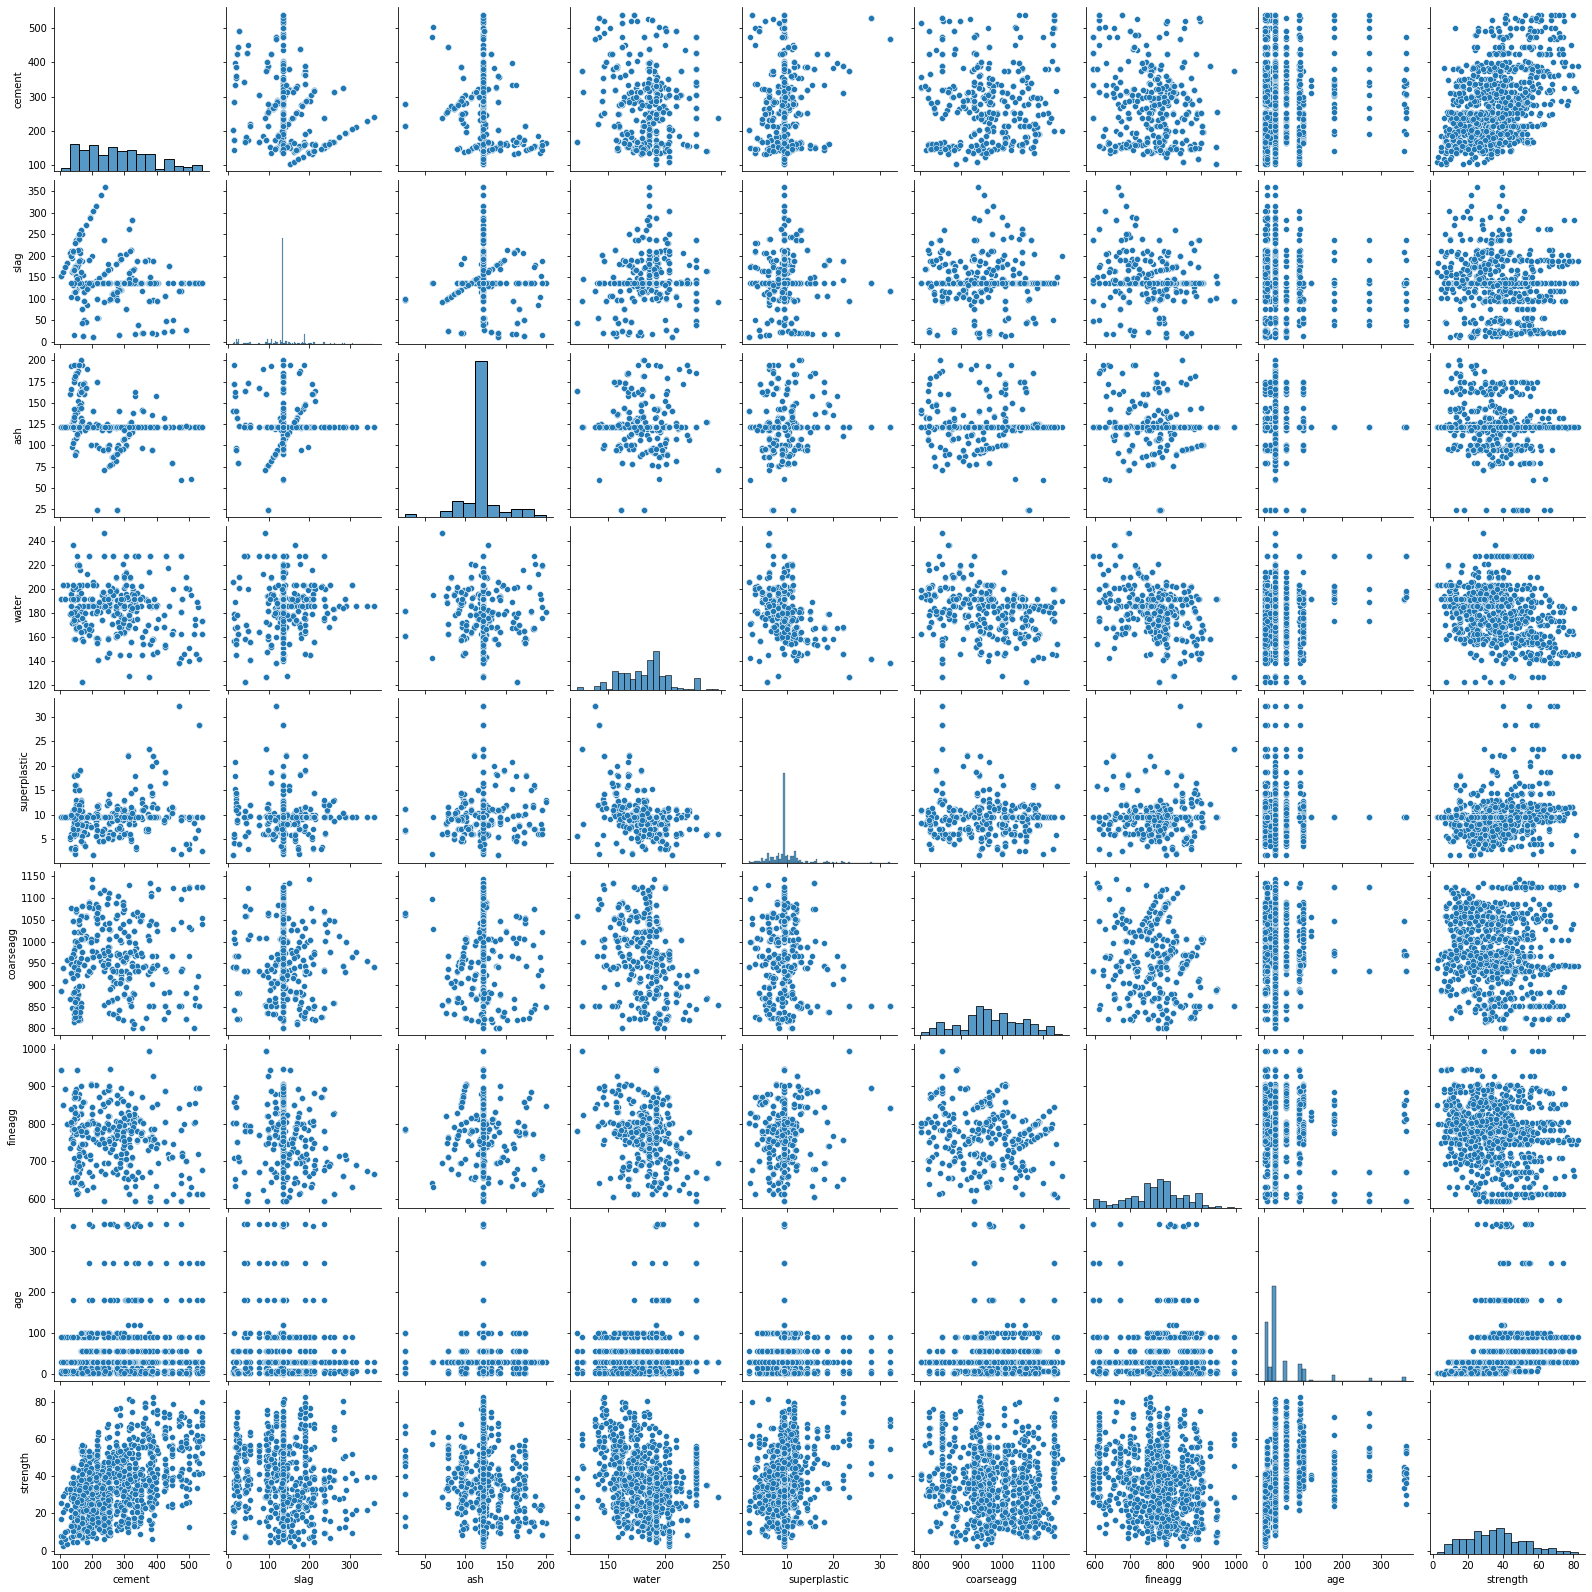

In [115]:
sns.pairplot(data)
plt.show()

## no correlation between individual variables

# **heatmap**

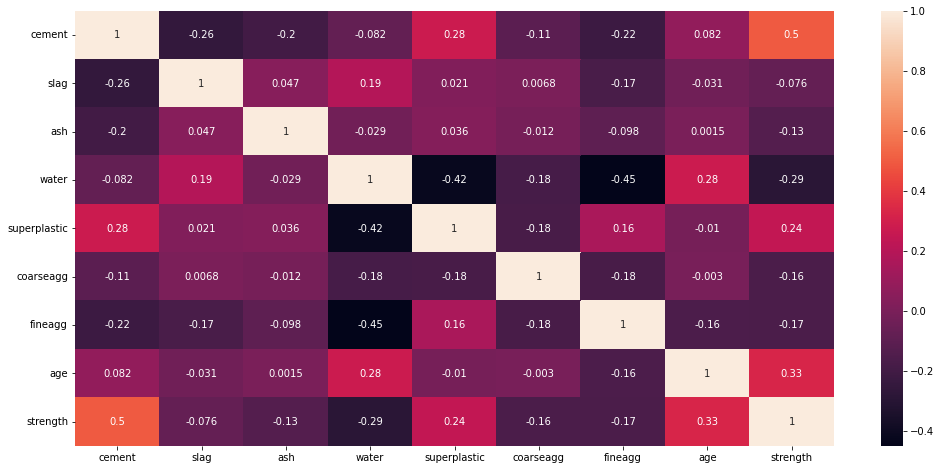

In [116]:
plt.figure(figsize=[17,8])
sns.heatmap(data.corr(),annot=True,)

**OBSERVATIONS**

1)Except cement there is no high correlation between strength and other features.

2)Fine-aggregate,coarse-aggregate,water,ash and slag have negative correlation with strength.

3)Age and superplastic are strongly correlated with strength.

**BOXPLOT**

In [117]:
from scipy import stats
Q1=data['cement'].quantile(q=0.25)
Q3=data['cement'].quantile(q=0.75)
print('1st quartile (Q1) is:',Q1)
print('2nd quartile (Q3) is:',Q3)
print ('interquartile range(IQR) IS:',stats.iqr(data['cement']))

1st quartile (Q1) is: 192.375
2nd quartile (Q3) is: 350.0
interquartile range(IQR) IS: 157.625


In [118]:
low=Q1-1.5*(Q3-Q1)
upp=Q3+1.5*(Q3-Q1)
print('lower:',low)
print('upper:',upp)

lower: -44.0625
upper: 586.4375


In [119]:
print('no of outliers in cement upper:',data[data['cement']>586.4375]['cement'].count())
print('no of outliers in cement lower:',data[data['cement']<-44.0625]['cement'].count())

no of outliers in cement upper: 0
no of outliers in cement lower: 0


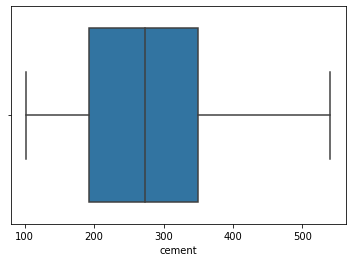

In [120]:
sns.boxplot(x='cement' ,data=data)

hence no outliers

# **SLAG**

In [121]:
Q1=data['slag'].quantile(q=0.25)
Q3=data['slag'].quantile(q=0.75)
print('1st quartile (Q1) is:',Q1)
print('2nd quartile (Q3) is:',Q3)
print ('interquartile range(IQR) IS:',stats.iqr(data['slag']))

1st quartile (Q1) is: 129.8
2nd quartile (Q3) is: 142.95
interquartile range(IQR) IS: 13.149999999999977


In [122]:
low=Q1-1.5*(Q3-Q1)
upp=Q3+1.5*(Q3-Q1)
print('lower:',low)
print('upper:',upp)

lower: 110.07500000000005
upper: 162.67499999999995


In [123]:
print('no of outliers in slag upper:',data[data['slag']>162.67499999999995]['slag'].count())
print('no of outliers in slag lower:',data[data['slag']<110.07500000000005]['slag'].count())

no of outliers in slag upper: 207
no of outliers in slag lower: 199


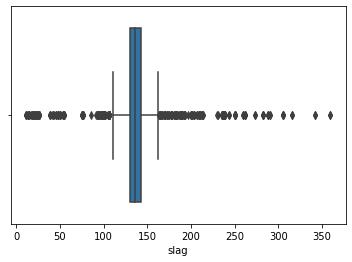

In [124]:
sns.boxplot(x='slag',data=data)

there is an outlier

# **WATER**

In [125]:
Q1=data['water'].quantile(q=0.25)
Q3=data['water'].quantile(q=0.75)
print('1st quartile (Q1) is:',Q1)
print('2nd quartile (Q3) is:',Q3)
print ('interquartile range(IQR) IS:',stats.iqr(data['water']))

1st quartile (Q1) is: 164.9
2nd quartile (Q3) is: 192.0
interquartile range(IQR) IS: 27.099999999999994


In [126]:
low=Q1-1.5*(Q3-Q1)
upp=Q3+1.5*(Q3-Q1)
print('lower:',low)
print('upper:',upp)

lower: 124.25000000000001
upper: 232.64999999999998


In [127]:
print('no of outliers in water upper:',data[data['water']>232.64999999999998]['water'].count())
print('no of outliers in watert lower:',data[data['water']<124.25000000000001]['water'].count())

no of outliers in water upper: 4
no of outliers in watert lower: 5


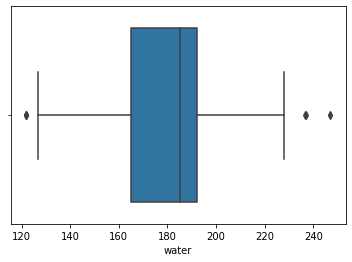

In [128]:
sns.boxplot(x='water',data=data)

There is an outlier in water

# **ASH**

In [129]:
Q1=data['ash'].quantile(q=0.25)
Q3=data['ash'].quantile(q=0.75)
print('1st quartile (Q1) is:',Q1)
print('2nd quartile (Q3) is:',Q3)
print ('interquartile range(IQR) IS:',stats.iqr(data['ash']))

1st quartile (Q1) is: 121.4
2nd quartile (Q3) is: 121.4
interquartile range(IQR) IS: 0.0


In [130]:
low=Q1-1.5*(Q3-Q1)
upp=Q3+1.5*(Q3-Q1)
print('lower:',low)
print('upper:',upp)

lower: 121.4
upper: 121.4


In [131]:
print('no of outliers in ash upper:',data[data['ash']>121.4]['ash'].count())
print('no of outliers in ash lower:',data[data['ash']<121.4]['ash'].count())

no of outliers in ash upper: 228
no of outliers in ash lower: 231


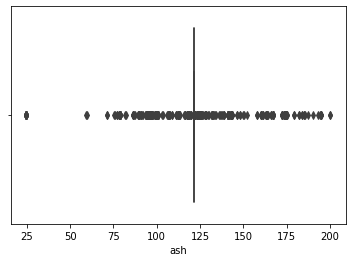

In [132]:
sns.boxplot(x='ash',data=data)

there is an outlier in ash

# **SUPER PLASTIC**

In [133]:
Q1=data['superplastic'].quantile(q=0.25)
Q3=data['superplastic'].quantile(q=0.75)
print('1st quartile (Q1) is:',Q1)
print('2nd quartile (Q3) is:',Q3)
print ('interquartile range(IQR) IS:',stats.iqr(data['superplastic']))

1st quartile (Q1) is: 8.2
2nd quartile (Q3) is: 10.2
interquartile range(IQR) IS: 2.0


In [134]:
low=Q1-1.5*(Q3-Q1)
upp=Q3+1.5*(Q3-Q1)
print('lower:',low)
print('upper:',upp)

lower: 5.199999999999999
upper: 13.2


In [135]:
print('no of outliers in superplastic upper:',data[data['superplastic']>13.2]['superplastic'].count())
print('no of outliers in superplastic lower:',data[data['superplastic']< 5.199999999999999]['superplastic'].count())

no of outliers in superplastic upper: 83
no of outliers in superplastic lower: 63


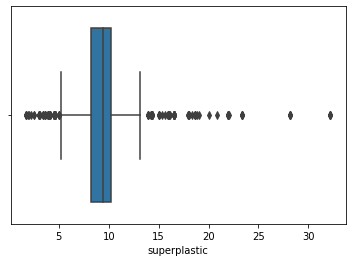

In [136]:
sns.boxplot(x='superplastic',data=data)

there is an outlier in superplastic

# **COARSE-AGGREGATION**

In [137]:
Q1=data['coarseagg'].quantile(q=0.25)
Q3=data['coarseagg'].quantile(q=0.75)
print('1st quartile (Q1) is:',Q1)
print('2nd quartile (Q3) is:',Q3)
print ('interquartile range(IQR) IS:',stats.iqr(data['coarseagg']))

1st quartile (Q1) is: 932.0
2nd quartile (Q3) is: 1029.4
interquartile range(IQR) IS: 97.40000000000009


In [138]:
low=Q1-1.5*(Q3-Q1)
upp=Q3+1.5*(Q3-Q1)
print('lower:',low)
print('upper:',upp)

lower: 785.8999999999999
upper: 1175.5000000000002


In [139]:
print('no of outliers in coarseagg upper:',data[data['coarseagg']>1175.5000000000002]['coarseagg'].count())
print('no of outliers in coarseagg lower:',data[data['coarseagg']<785.8999999999999]['coarseagg'].count())

no of outliers in coarseagg upper: 0
no of outliers in coarseagg lower: 0


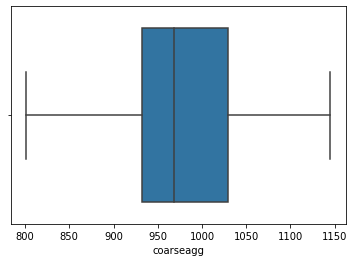

In [140]:
sns.boxplot(x='coarseagg',data=data)

no outliers in coarse aggregation

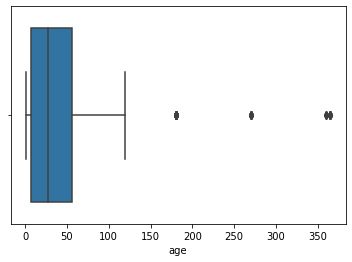

In [141]:
sns.boxplot(x='age',data=data)

there is an outlier in age

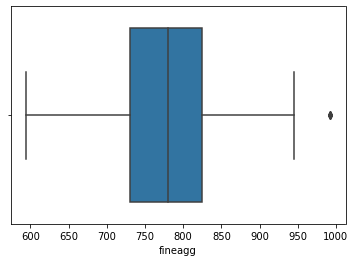

In [142]:
sns.boxplot(x='fineagg',data=data)

there is an outlier in fineagg

## replacing outlier with median

In [143]:
for cols in data.columns[:-1]:
  Q1=data[cols].quantile(0.25)
  Q3=data[cols].quantile(0.75)
  iqr=Q3-Q1
  LOW=Q1-1.5*iqr
  UPP=Q3+1.5*iqr
  data.loc[(data[cols]<LOW)|(data[cols]>UPP),cols]=data[cols].median()

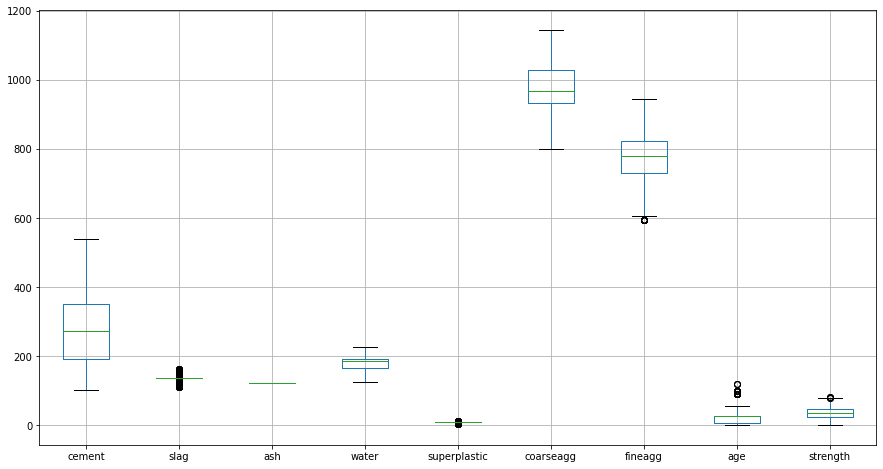

In [144]:
data.boxplot(figsize=[15,8])

# **SPLIT DATA**

In [145]:
x=data.drop(['strength'],axis=1)
y=data[['strength']]

x:independent variables

y:dependent variable

In [146]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

**Linear Regression**

In [147]:
lr=LinearRegression(fit_intercept=True)
lr.fit(x_train,y_train)

LinearRegression()

In [148]:
lr.score(x_train,y_train)

0.6922255968663805

In [149]:
lr.score(x_test,y_test)

0.6651166695483659

In [150]:
y_pred=lr.predict(x_test)
y_pred

array([[46.33788053],
       [59.81652239],
       [31.29337797],
       [23.57984375],
       [20.76443844],
       [20.57571392],
       [41.64067807],
       [72.16518964],
       [22.22698839],
       [26.21416089],
       [46.00689054],
       [10.23099657],
       [39.92211027],
       [26.04753915],
       [58.15091622],
       [36.32492955],
       [29.35584424],
       [22.34564211],
       [20.31218853],
       [30.95868322],
       [25.51773438],
       [37.76169685],
       [15.48054077],
       [41.37019155],
       [30.99019866],
       [53.99103307],
       [56.64420955],
       [44.37282749],
       [35.92232003],
       [37.67771531],
       [18.13299572],
       [40.74541013],
       [30.56255372],
       [28.16493381],
       [27.71543061],
       [40.82270318],
       [18.31860346],
       [18.20974987],
       [16.14426604],
       [57.43553121],
       [17.61425274],
       [20.21594387],
       [70.29131756],
       [76.46436297],
       [33.82856357],
       [43

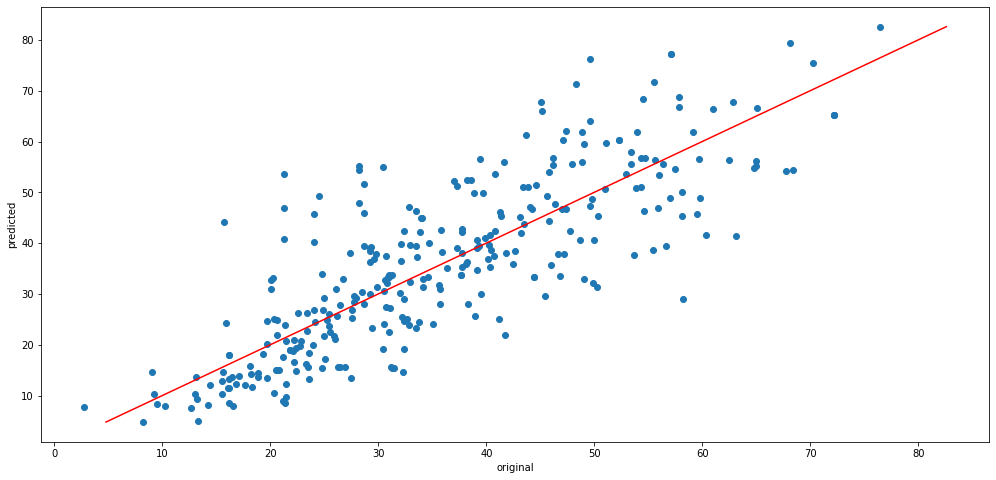

In [151]:
plt.figure(figsize=[17,8])
plt.scatter(y_pred,y_test)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color='red')
plt.xlabel('original')
plt.ylabel('predicted')
plt.show()


In [152]:
acc=metrics.r2_score(y_test,y_pred)
acc

0.6651166695483659

## ACCURACY OF LINEAR REGRESSION

In [153]:
result1=pd.DataFrame({'Algorithm':['LINEAR REGRESSION'],'accuracy':acc},index={'1'})
results=result1[['Algorithm','accuracy']]
results

,Algorithm,accuracy
1,LINEAR REGRESSION,0.665117


#KNN

In [154]:
from sklearn.neighbors import KNeighborsRegressor

In [155]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [156]:
y_pred=knn.predict(x_test)
y_pred

array([[41.564],
       [70.33 ],
       [30.124],
       [24.004],
       [26.66 ],
       [26.052],
       [41.06 ],
       [62.158],
       [27.178],
       [31.316],
       [43.89 ],
       [14.812],
       [34.994],
       [31.624],
       [49.362],
       [43.98 ],
       [37.838],
       [18.126],
       [20.37 ],
       [30.124],
       [20.212],
       [50.826],
       [14.716],
       [45.952],
       [31.204],
       [51.908],
       [38.584],
       [51.278],
       [34.526],
       [32.296],
       [20.416],
       [40.878],
       [29.444],
       [52.164],
       [26.706],
       [41.924],
       [25.99 ],
       [24.592],
       [15.64 ],
       [53.512],
       [21.086],
       [21.328],
       [63.666],
       [76.44 ],
       [31.276],
       [29.804],
       [37.158],
       [45.29 ],
       [39.174],
       [41.126],
       [41.316],
       [24.672],
       [19.412],
       [28.068],
       [24.886],
       [28.808],
       [14.654],
       [23.502],
       [21.072

In [157]:
knn.score(x_train,y_train)

0.7499101482498938

In [158]:
knn.score(x_test,y_test)

0.6905896969142811

In [159]:
acc=metrics.r2_score(y_test,y_pred)
acc

0.6905896969142811

## ACCURACY OF KNN

In [160]:
result=pd.DataFrame({'Algorithm':['KNN'],'accuracy':acc},index={'2'})
results=result[['Algorithm','accuracy']]
results

,Algorithm,accuracy
2,KNN,0.69059


# SVM

In [161]:
from sklearn.svm import SVR

In [162]:
svm=SVR(kernel ='linear',degree=3,gamma='auto')
svm.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(gamma='auto', kernel='linear')

In [163]:
y_pred=svm.predict(x_test)
y_pred

array([48.05062406, 60.64534539, 28.32715325, 21.34488775, 19.76671675,
       21.92080177, 39.89153192, 75.30098974, 21.03338369, 26.52515544,
       46.14148192,  7.31315689, 39.38355592, 23.74172818, 57.93608794,
       35.46851484, 27.42412684, 19.86516111, 19.80569983, 28.75135405,
       23.01691757, 35.880478  , 15.80865412, 41.86983433, 28.97391607,
       54.43426761, 57.23939782, 45.66527898, 34.30799529, 38.23186147,
       15.97211309, 39.15539925, 28.70465643, 26.72289409, 25.50334924,
       40.50377236, 18.10591944, 15.6533359 , 16.76885535, 57.0781098 ,
       16.95022997, 21.11410462, 71.13124285, 77.93567311, 30.61738925,
       41.93956649, 27.27362387, 27.40810284, 29.3528357 , 51.42946898,
       45.22017761, 28.69857594, 14.99037574, 13.97644143, 22.09620034,
       33.2936638 , 10.81785675, 23.04427135, 17.4335702 , 25.5596313 ,
       47.13631461, 44.76170575, 16.86889288, 56.39323449, 64.45008686,
       47.01235675, 19.98865401, 14.46157637, 29.58391217, 21.58

In [164]:
svm.score(x_train,y_train)

0.6830821246102035

In [165]:
svm.score(x_test,y_test)

0.6405615035909693

In [166]:
acc=metrics.r2_score(y_test,y_pred)
acc

0.6405615035909693

## ACCURACY OF SVM

In [167]:
result=pd.DataFrame({'Algorithm':['SVM'],'accuracy':acc},index={'3'})

results=result[['Algorithm','accuracy']]
results

,Algorithm,accuracy
3,SVM,0.640562


# DECISION TREE

In [168]:
from sklearn.tree import DecisionTreeRegressor
dtc=DecisionTreeRegressor(splitter ="random",min_samples_split=25)

In [169]:
dtc.fit(x_train,y_train)

DecisionTreeRegressor(min_samples_split=25, splitter='random')

In [170]:
y_pred=dtc.predict(x_test
                   )

In [171]:
dtc.score(x_train,y_train)

0.7591540884843727

In [172]:
dtc.score(x_test,y_test)

0.6973423694518093

In [173]:
acc=metrics.r2_score(y_test,y_pred)
acc

0.6973423694518093

### ACCURACY OF DECISION TREE

In [174]:
result=pd.DataFrame({'Algorithm':['DECISION TREE'],'accuracy':acc},index={'4'})
results=result[['Algorithm','accuracy']]
results

,Algorithm,accuracy
4,DECISION TREE,0.697342


# RANDOMFOREST

In [175]:
from sklearn.ensemble import RandomForestRegressor

In [176]:
rfc=RandomForestRegressor(ccp_alpha=2,n_estimators = 100)

In [177]:
rfc.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(ccp_alpha=2)

In [178]:
y_pred=rfc.predict(x_test)
y_pred

array([37.32286613, 42.13763842, 29.3761559 , 26.30497937, 17.3070174 ,
       25.69586784, 36.62594335, 64.46092674, 26.48065823, 36.27636452,
       35.64469277, 15.91353992, 44.33711074, 17.64995256, 49.92886204,
       24.66269758, 34.0076409 , 28.22299426, 30.93285553, 29.15057057,
       31.35535888, 22.02184768, 17.01823174, 43.96248866, 29.40155363,
       64.17635398, 37.02587468, 36.91622637, 39.63558328, 27.48899312,
       14.46521156, 44.14170782, 44.98190106, 43.0250468 , 33.34626602,
       41.05863425, 16.11761259, 17.58143427, 26.12116305, 42.21976401,
       15.35968978, 26.05490376, 64.52126009, 65.32907289, 29.31541225,
       40.07037534, 26.48065823, 16.89563749, 36.34333023, 38.4125653 ,
       50.13192994, 39.47542812, 13.94951086, 14.46161737, 18.08504229,
       43.72465747, 13.27221257, 33.37275426, 15.24236783, 41.95768442,
       36.27956322, 49.58175283, 26.4159929 , 67.6715743 , 63.34420385,
       41.6195309 , 28.99583082, 15.82882694, 30.69143944, 25.45

In [179]:
rfc.score(x_train,y_train)

0.8192353126084012

In [180]:
rfc.score(x_test,y_test)

0.7419921477561418

In [181]:
acc=metrics.r2_score(y_test,y_pred)
acc

0.7419921477561418

### ACCURACY OF RANDOM FOREST

In [182]:
result=pd.DataFrame({'Algorithm':['Random Forest'],'accuracy':acc},index={'5'})
results=result[['Algorithm','accuracy']]
results


,Algorithm,accuracy
5,Random Forest,0.741992


### We have analysed the compressive strength and used machine learning to predict compresive strength of concrete.we have made use of Linear Regression ,Decision tree ,random forest,svm and knn and compared their performance.Random forest model is best choice.As we can see random forest model gives better accuracy compared to other models.hence random forest is the best choice for this problem